# AI assesment for facial recognition 


My fellow collegue who have been working and contributing together in this project

**@Ashis, @Saujan, @Pasang, @Uttam**

Please refer the comments and documentation for usage and porcess for corresponding result

there will be supporting python code for supplementing the developments,
code will be primaryly checked and runned on jupyter notebook enviroment

seperated code will also be provided with official documentation


# Importing all the libraries 

In [57]:
%matplotlib inline

import os
import cv2
import sys
import numpy as np
import scipy as sp
import matplotlib
import matplotlib.pyplot as plt
from skimage import io
from time import time
from PIL import Image
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Read The images

In [69]:
cwd = os.getcwd()
print("current working directory is %s" %(cwd))

ImageFolder = 'Tr20'
dataPath = []
for i in os.listdir(ImageFolder):
    if i != 'readme.text':
        dataPath.append(os.path.join(ImageFolder, i))
       
imData   = []  
imLabels = []

for file in dataPath:
    imRead = io.imread(file, as_gray=True)
    imData.append(imRead)
    labelRead = int(os.path.split(file)[1].split("B")[1].split("_")[0])
    imLabels.append(labelRead)

current working directory is /Users/uttam/Dropbox/sandbox-stuffs/college paper-2018_sep/Ai_final works/AI_codebase


# validating entry is correct or not

lists of image are 1070
lists of labels 22


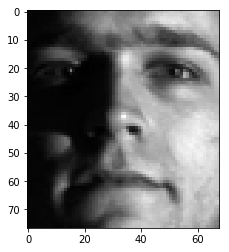

In [75]:
#listOfImages
ImgLists = len(imData)

#loading random images for validation purpose
x = imData[np.random.randint(0, ImgLists)]
plt.imshow(x, cmap='gray')
labels = len(np.unique(imLabels))
print ('lists of image are', ImgLists)
print ('lists of labels', labels)
plt.show()

# Splitting of image sets

dtype('uint8')

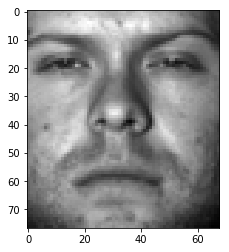

In [76]:
faceReadData = plt.imread("Tr20/yaleB01_P00A+010E+00.jpg")#importing froms source
plt.imshow(faceReadData, cmap='gray')#plotingtheimage
faceReadData.dtype

In [77]:
faceReadData.shape 

(77, 68)

In [78]:
faceReadData[20,30]

166

In [79]:
# transfroming the the values in array
x = np.array(imData) 
y = np.array(imLabels)

DataSize = 0.2

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=DataSize)

/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [80]:
noOfSamplesX = len(imData)
noOfSamplesY = len(imLabels)

if noOfSamplesX == noOfSamplesY:
    print('Total no of samples:', noOfSamplesX )
else:
    print('Total no of samples X: ', noOfSamplesX, 'and Total no of samples y:', noOfSamplesY)
noOfClasses = len(np.unique(y))
print ('no fo unique clases', noOfClasses)

Total no of samples: 1070
no fo unique clases 22


# training algorithm

In [81]:
x_train = x_train.astype('float32')
x_test  = x_test.astype('float32')

x_train /= 255.
x_test  /= 255.

x_train = x_train.reshape(x_train.shape[0], x_train.shape[1]* x_train.shape[2])
x_test  = x_test.reshape (x_test.shape [0], x_test.shape [1]* x_test.shape [2])

In [82]:
print("Training matrix shape", x_train.shape)
print("Testing matrix shape", x_test.shape)


nb_classes = len(np.unique(y_test))
print ('Number of unique classes ', nb_classes)

Training matrix shape (214, 5236)
Testing matrix shape (856, 5236)
Number of unique classes  22


# Applying PCA 


In [83]:
n_components = 200
h=77
w=68
print("Extraction of %d eigenfaces from %d faces sets"
      % (n_components, x_train.shape[0]))
t0 = time()
pca = PCA(n_components=n_components, svd_solver='randomized',
          whiten=True).fit(x_train)
print("done in %0.3fs" % (time() - t0))

eigenfaces = pca.components_.reshape((n_components, h, w))

print("input data on eigenfaces")
t0 = time()
x_trainPca = pca.transform(x_train)
x_testPca = pca.transform(x_test)
timePCA = time()-t0
print("done in %0.3fs" % timePCA)



Extraction of 200 eigenfaces from 214 faces sets
done in 0.182s
input data on eigenfaces
done in 0.035s


eigenface 134


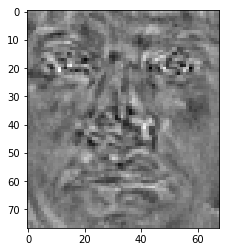

eigenface 130


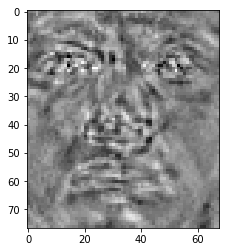

eigenface 89


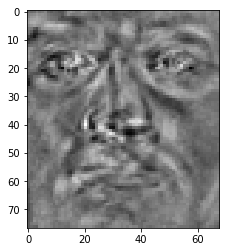

In [84]:
#plotting the eigen values
for z in range(3):
    i = np.random.randint(0,n_components)
    x = eigenfaces[i]
    print('eigenface',i)
    plt.imshow(x, cmap='gray')
    plt.show()